In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
#202031211 Firmansyah Davin Falahtama

In [2]:
dataset = pd.read_csv("sales.csv")
dataset

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,P815,0,0,1,0,0,2,1,0,0,...,0.00,0.33,0.33,0.00,0.00,0.33,0.00,0.00,0.67,0.00
807,P816,0,1,0,0,1,2,2,6,0,...,0.43,0.43,0.57,0.29,0.57,0.71,0.71,0.71,0.86,0.71
808,P817,1,0,0,0,1,1,2,1,1,...,0.50,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.75
809,P818,0,0,0,1,0,0,0,0,1,...,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.00


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Columns: 107 entries, Product_Code to Normalized 51
dtypes: float64(52), int64(54), object(1)
memory usage: 678.1+ KB


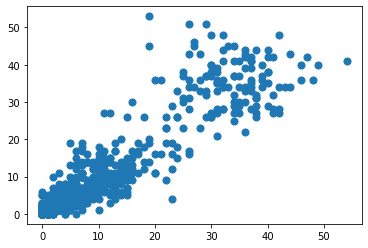

In [4]:
plt.scatter(dataset['W0'], dataset['W1'], s = 50) #s=size objek
plt.show()

In [5]:
data = np.asarray(dataset[['W0', 'W1']])
print(data)

[[11 12]
 [ 7  6]
 [ 7 11]
 ...
 [ 1  0]
 [ 0  0]
 [ 0  1]]


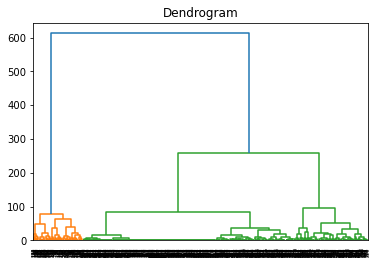

In [6]:
plt.title("Dendrogram")
dendrogram = sch.dendrogram(sch.linkage(data, method='ward'))

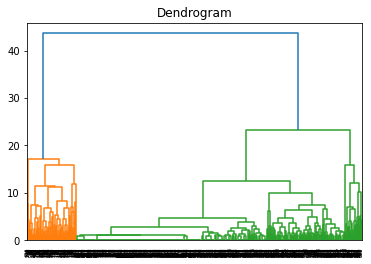

In [7]:
plt.title("Dendrogram")
dendrogram = sch.dendrogram(sch.linkage(data, method='average'))

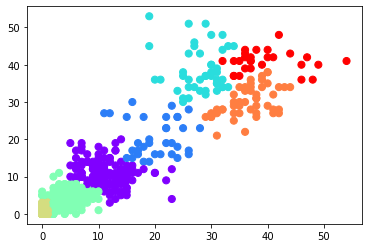

In [21]:
#linkage ward -> euclidian -> default
from sklearn.cluster import AgglomerativeClustering 
ac = AgglomerativeClustering(n_clusters= 7)
output_eu = ac.fit_predict(data)

plt.scatter(data[:,0], data[:,1], c = output_eu, s=50, cmap="rainbow")
plt.show()
#202031211 Firmansyah Davin Falahtama

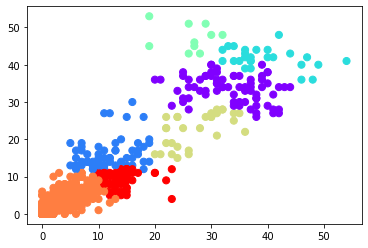

In [22]:
from sklearn.cluster import AgglomerativeClustering #manhattan complete
ac = AgglomerativeClustering(n_clusters= 7, affinity='manhattan', linkage='complete')
output_mc = ac.fit_predict(data)

plt.scatter(data[:,0], data[:,1], c = output_mc, s=50, cmap="rainbow")
plt.show()
#202031211 Firmansyah Davin Falahtama

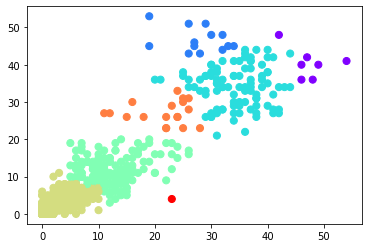

In [23]:
from sklearn.cluster import AgglomerativeClustering #manhattan average
ac = AgglomerativeClustering(n_clusters= 7, affinity='manhattan', linkage='average')
output_mav = ac.fit_predict(data)

plt.scatter(data[:,0], data[:,1], c = output_mav, s=50, cmap="rainbow")
plt.show()
#202031211 Firmansyah Davin Falahtama

In [20]:
#Evaluasi model
from sklearn.metrics import davies_bouldin_score


print (davies_bouldin_score(data, output_eu))
print (davies_bouldin_score(data, output_mc))
print (davies_bouldin_score(data, output_mav))
#skor terbaik mendekati 0

0.8300374165407752
0.9570333446586233
0.6703451414378961


In [ ]:
#202031211 Firmansyah Davin Falahtama